# TES2025 Workshop 3 - Satellite Data Analysis for Urban Expansion with Python

## 7. Map Visual

This sesstion is a relaxing part. The step for publishing map is introduced. Even thought there are varisou way of application development. This session employ `leafmap` library to allow us show the result on the interactive map viewer for more convenient for non-dev guys can do

In [1]:
!pip install rasterio leafmap localtileserver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.3/513.3 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.

In [2]:
import os
from leafmap import leafmap
import rasterio
import numpy as np
import matplotlib.pyplot as plt

Declare the base path

In [3]:
base_path = 'https://github.com/thanthamky/tes-urban/raw/refs/heads/main/'

Introduction of leafmap module

In [4]:
m = leafmap.Map()

m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Try add base map

In [5]:
m = leafmap.Map()

m.add_basemap("HYBRID")
m.add_basemap("Esri.NatGeoWorldMap")

m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Normally, we ever did use `rasterio` with `matplotlib` to extract image data and plot the image

In [6]:
with rasterio.open(base_path+'lulc_city_rf_2014.tif') as src:

    data = src.read()

use `plt.imshow`

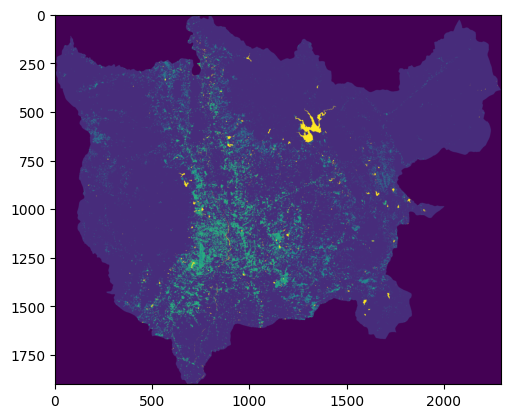

In [7]:
plt.imshow(data.transpose(1, 2, 0))

But this step we can use `leafmap` to add raster file path in the layer to overlay on the basemap

In [8]:
m = leafmap.Map()

m.add_raster(base_path + 'camk-images/lulc_rf_2014_color_cog.tif', layer_name="LULC 2014")
m.add_raster(base_path + 'camk-images/lulc_rf_2024_color_cog.tif', layer_name="LULC 2024")

m

Map(center=[18.845892, 99.07596050000001], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in…

Another option is we use `COG (Cloud-Optimzed-GeoTiff)` raster format this helps more faster loading and tile loading without significant waiting time

In [9]:
m = leafmap.Map()

m.add_cog_layer(base_path + 'camk-images/lulc_rf_2014_color_cog.tif', name="LULC 2014")
m.add_cog_layer(base_path + 'camk-images/lulc_rf_2024_color_cog.tif', name="LULC 2024")

m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Major part of this session is to implement time-series representation of LULC change of each step of simulations

In [10]:
raster_list = [
    base_path + 'camk-images/lulc_rf_2014_color_cog.tif',
    base_path + 'camk-images/lulc_rf_2024_color_cog.tif',
    base_path + 'camk-images/lulc_city_camk_2024_5step_1_color_cog.tif',
    base_path + 'camk-images/lulc_city_camk_2024_5step_2_color_cog.tif',
    base_path + 'camk-images/lulc_city_camk_2024_5step_3_color_cog.tif',
    base_path + 'camk-images/lulc_city_camk_2024_5step_4_color_cog.tif',
    base_path + 'camk-images/lulc_city_camk_2024_5step_5_color_cog.tif',
]


m = leafmap.Map()

m.add_time_slider(
    raster_list,
    time_interval=2,
    position="bottomright",
    band=[1,2,3],
    zoom_to_layer=True,
)
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## 8. Publishing Web Map Application

Also, in case we have to publish the map application on the internet we can do some `leafmap` object and export using `m.to_html*()` function to get HTML file

In [11]:
import leafmap.foliumap as leafmap
#import leafmap.deck as leafmap
#import leafmap.kepler as leafmap
#import leafmap.plotlymap as leafmap


m = leafmap.Map()

m.add_basemap('HYBRID')

m.add_cog_layer(base_path + 'camk-images/lulc_rf_2014_color_cog.tif', name="LULC 2014")
m.add_cog_layer(base_path + 'camk-images/lulc_rf_2024_color_cog.tif', name="LULC 2024")

m.add_cog_layer(base_path + 'camk-images/lulc_city_camk_2024_5step_1_color_cog.tif', name="LULC 2034")
m.add_cog_layer(base_path + 'camk-images/lulc_city_camk_2024_5step_2_color_cog.tif', name="LULC 2044")
m.add_cog_layer(base_path + 'camk-images/lulc_city_camk_2024_5step_3_color_cog.tif', name="LULC 2054")
m.add_cog_layer(base_path + 'camk-images/lulc_city_camk_2024_5step_4_color_cog.tif', name="LULC 2064")
m.add_cog_layer(base_path + 'camk-images/lulc_city_camk_2024_5step_5_color_cog.tif', name="LULC 2074")


m

Export the web map application

In [ ]:
m.to_html('lulc_change_map.html')

## 5.  Reviewing Remote Sensing Use Cases

How the web map application looks like on the internet, you can see this

[Web map application](https://thanthamky.github.io/tes-urban/)

<iframe src="https://thanthamky.github.io/tes-urban/" width="100%" height="640"></iframe>